# ML Case Study: Predicting Travel Insurance Purchases
**Problem Statement**
We want to predict whether a customer will buy travel insurance based on features such as their age, gender, travel purpose, country, and other demographic information.

**Target Variable:** Purchased_Insurance (1 = Purchased, 0 = Not Purchased)

**Dataset Overview**
The dataset contains the following columns:

Age: The age of the customer

Gender: The gender of the customer (Male/Female)

Annual_Income: The annual income of the customer

Travel_Purpose: The purpose of the trip (Business or Leisure)

Country: The country of the customer

Purchased_Insurance: Target variable indicating whether the customer purchased insurance (1 = Yes, 0 = No)

# Step-by-Step Breakdown

**Data Collection**

In [ ]:
import kagglehub

# Download latest version
kagglehub.dataset_download("tejashvi14/travel-insurance-prediction-data")


100%|██████████| 13.0k/13.0k [00:00<00:00, 20.1MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/tejashvi14/travel-insurance-prediction-data/versions/4'

In [ ]:
import pandas as pd

df = pd.read_csv('/root/.cache/kagglehub/datasets/tejashvi14/travel-insurance-prediction-data/versions/4/TravelInsurancePrediction.csv')
df.head()
df1=df

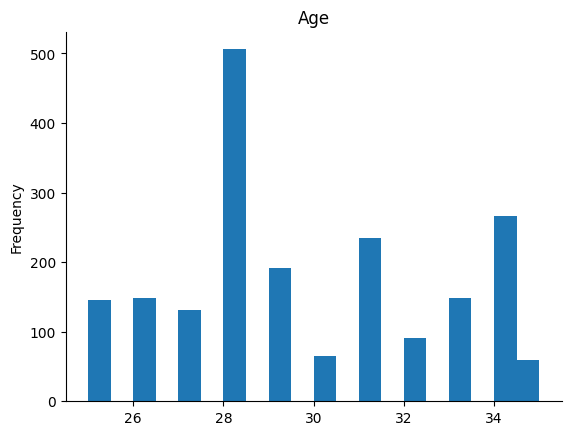

In [ ]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data Exploration and Understanding
The first step is to explore the dataset and understand its structure.

Employment Type
Government Sector               7.253509e+05
Private Sector/Self Employed    1.016196e+06
Name: AnnualIncome, dtype: float64


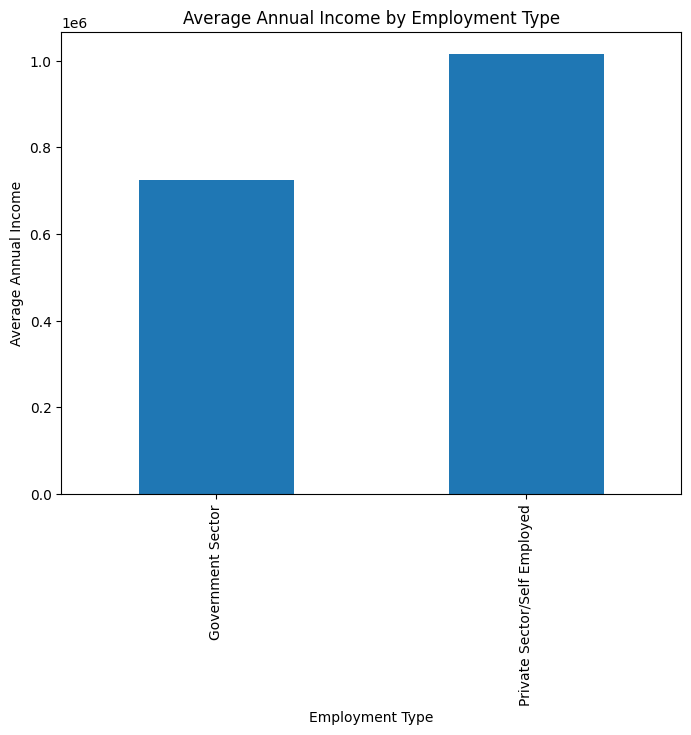

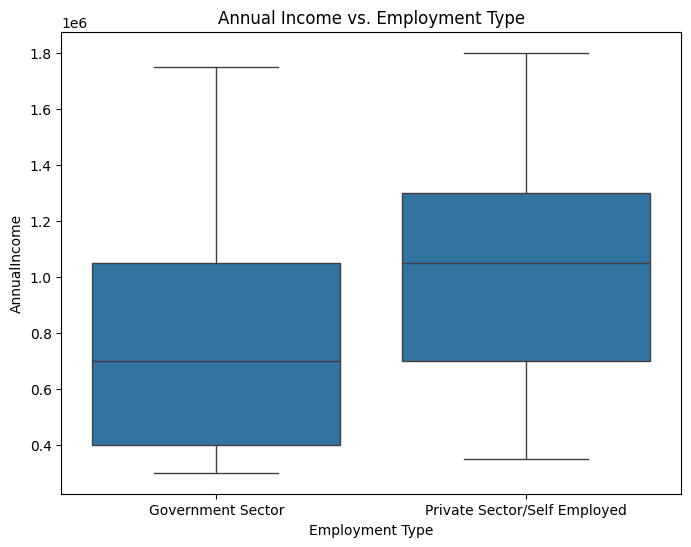

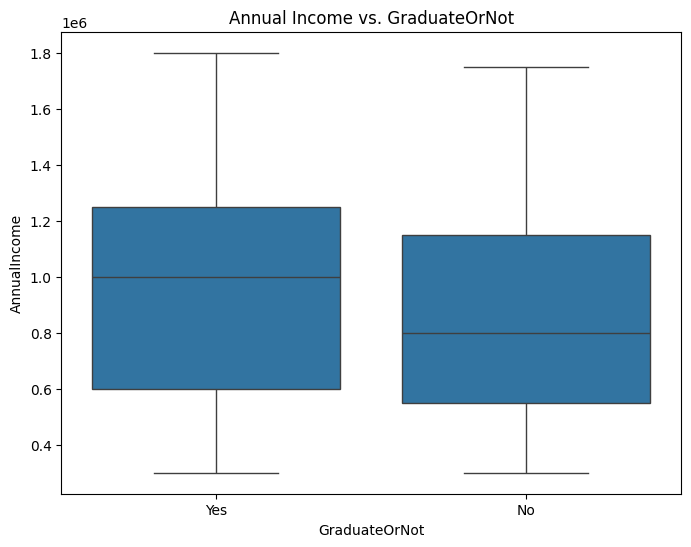

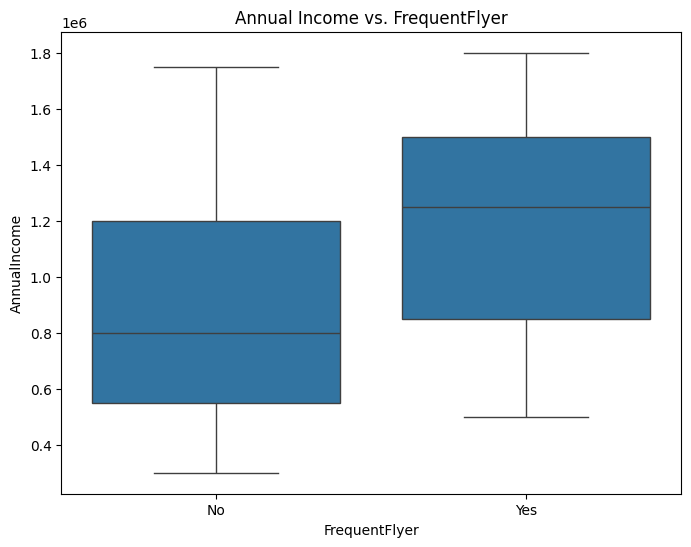

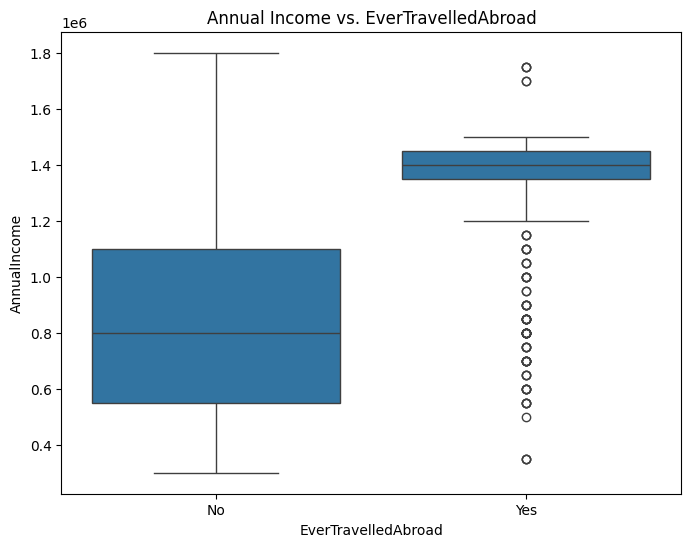

In [ ]:
# prompt: Using dataframe df: now we want to have dATA EXPLORATION OF DF, corelation of variables like annual income and employment type and rest of the variable

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()


# Explore the relationship between Annual Income and Employment Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Employment Type', y='AnnualIncome', data=df)
plt.title('Annual Income vs. Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Annual Income')
plt.show()

#Further exploration by creating different plots for other variable relationships
# Example: Annual Income vs. Age
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='AnnualIncome', data=df)
plt.title('Annual Income vs Age')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()


# Example: Annual Income vs Family Members
plt.figure(figsize=(8,6))
sns.regplot(x='FamilyMembers', y='AnnualIncome', data =df)
plt.title('Annual Income vs Family Members')
plt.xlabel('Family Members')
plt.ylabel('Annual Income')
plt.show()

# You can continue to create similar plots for other pairs of variables
# to understand their relationships.

# Descriptive statistics for numerical variables
print(df.describe())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
# prompt: Using dataframe df: clean the data, we need to encode categorical features and scale the numerical features.  do not scale the binary categorical features, use minmax scaler

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Remove binary categorical features from scaling
binary_categorical_cols = ['ChronicDiseases', 'TravelInsurance']
numerical_cols = [col for col in numerical_cols if col not in binary_categorical_cols]

# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for later use if needed


# Scale numerical features using MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the transformed DataFrame
print(df.head())

   Unnamed: 0  Age  Employment Type  GraduateOrNot  AnnualIncome  \
0    0.000000  0.6                0              1      0.066667   
1    0.000504  0.6                1              1      0.633333   
2    0.001007  0.9                1              1      0.133333   
3    0.001511  0.3                1              1      0.266667   
4    0.002014  0.3                1              1      0.266667   

   FamilyMembers  ChronicDiseases  FrequentFlyer  EverTravelledAbroad  \
0       0.571429                1              0                    0   
1       0.714286                0              0                    0   
2       0.285714                1              0                    0   
3       0.142857                1              0                    0   
4       0.857143                1              1                    0   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0  


In [ ]:
df.describe()


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,0.500000,0.465023,0.713135,0.851535,0.421842,0.393271,0.277806,0.209864,0.191243,0.357323
std,0.288893,0.291331,0.452412,0.355650,0.251237,0.229950,0.448030,0.407314,0.393379,0.479332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.300000,0.000000,1.000000,0.200000,0.285714,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.400000,1.000000,1.000000,0.400000,0.428571,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.700000,1.000000,1.000000,0.633333,0.571429,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Preprocessing
We'll clean the data, handle missing values, encode categorical variables, and scale numerical features.

Handling Missing Data:
If there are missing values in any columns, we need to handle them. For simplicity, let's assume we'll drop rows with missing target values and impute or drop missing numerical values.

In [ ]:
print(df.isnull().sum())
print(df.duplicated().sum())

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64
0


0


# Splitting the Data into Training and Testing Sets
We’ll split the data into training and testing sets (80% train, 20% test).

In [ ]:
# prompt: we need to split into test train

from sklearn.model_selection import train_test_split

# Assuming 'Purchased_Insurance' is your target variable
X = df.drop('TravelInsurance', axis=1)
y = df['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1589, 9)
y_train shape: (1589,)
X_test shape: (398, 9)
y_test shape: (398,)


In [ ]:
X_train.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')

# Model Selection and Training
We’ll train multiple models to predict the target variable Purchased_Insurance:

Logistic Regression

Decision Tree Classifier

Random Forest Classifier

Support Vector Machine (SVM)

In [ ]:
# prompt: we need to apply multiple models to predict the target
# Logistic Regression
# Decision Tree Classifier
# Random Forest Classifier
# Support Vector Machine (SVM)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred)
    }
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression Accuracy: 0.7638190954773869
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       257
           1       0.76      0.48      0.59       141

    accuracy                           0.76       398
   macro avg       0.76      0.70      0.71       398
weighted avg       0.76      0.76      0.75       398

Decision Tree Accuracy: 0.7688442211055276
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       257
           1       0.67      0.70      0.68       141

    accuracy                           0.77       398
   macro avg       0.75      0.75      0.75       398
weighted avg       0.77      0.77      0.77       398

Random Forest Accuracy: 0.8190954773869347
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      

# Model Evaluation
We'll evaluate each model using accuracy, confusion matrix, precision, recall, and F1-score.

In [ ]:
# prompt: generate classification report

# Assuming 'results' dictionary is already populated as in the provided code.

for name, result in results.items():
    print(f"{name} Classification Report:\n{result['classification_report']}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       257
           1       0.76      0.48      0.59       141

    accuracy                           0.76       398
   macro avg       0.76      0.70      0.71       398
weighted avg       0.76      0.76      0.75       398

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       257
           1       0.67      0.70      0.68       141

    accuracy                           0.77       398
   macro avg       0.75      0.75      0.75       398
weighted avg       0.77      0.77      0.77       398

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       257
           1       0.83      0.62      0.71       141

    accuracy                           0.82       398
   macro av

# Model Deployment (Optional)
We can save the best model for future use and create a simple API to serve predictions.

In [ ]:
# prompt: now we need to save the model using joblib library

import joblib

# Assuming 'model' is the best performing model from the previous steps.
# Replace 'best_model' with the actual variable name of your best model.
best_model = models["Random Forest"] #Example, replace with your best model

# Save the model to a file
filename = 'travel_insurance_model.joblib'
joblib.dump(best_model, filename)

print(f"Model saved to {filename}")

Model saved to travel_insurance_model.joblib
